In [1]:
import pandas as pd
import sklearn
import seaborn as sns
PATH = "data\\lyrics.csv"

In [2]:
df_lyrics = pd.read_csv(PATH, encoding='utf-8')

In [3]:
df_lyrics.head()

,year,name,lyrics
0,1985,Stand Up For Singapore,"Stand up for Singapore, do the best you can\nR..."
1,1986,Count On Me Singapore,"We have a vision for tomorrow, just believe, j..."
2,1987,We Are Singapore,There was a time when people said\nThat Singap...
3,1989,Five Stars Arising,"There's a new moon arising, out of the stormy ..."
4,1991,It’s the Little Things,"Over the years, I've grown to be a part of you..."


## Data Cleaning

In [4]:
df_lyrics.dtypes

year       int64
name      object
lyrics    object
dtype: object

In [5]:
df_lyrics["lyrics"] = df_lyrics["lyrics"].apply(lambda s : s.replace("\n", " "))

In [6]:
df_lyrics.head()

,year,name,lyrics
0,1985,Stand Up For Singapore,"Stand up for Singapore, do the best you can Re..."
1,1986,Count On Me Singapore,"We have a vision for tomorrow, just believe, j..."
2,1987,We Are Singapore,There was a time when people said That Singapo...
3,1989,Five Stars Arising,"There's a new moon arising, out of the stormy ..."
4,1991,It’s the Little Things,"Over the years, I've grown to be a part of you..."


In [7]:
# Find total number of words for each song
import re
df_lyrics["num_words"] = df_lyrics["lyrics"].apply(lambda s : len(re.findall(r'\w+', s)))

In [8]:
# Find average char length for each word per song
def avg_word_length(s) :
    num_words = len(re.findall(r'\w+', s))
    list_of_words = s.split()
    total_num_char = sum(len(i) for i in list_of_words)
    return(total_num_char / num_words)

df_lyrics["avg_word_len"] = df_lyrics["lyrics"].apply(lambda s : avg_word_length(s))

In [9]:
df_lyrics["avg_word_len"]

0     4.158333
1     3.809249
2     4.468208
3     3.992593
4     3.682759
5     3.980645
6     3.809249
7     4.444444
8     3.822917
9     4.458015
10    4.458015
11    3.952381
12    3.711382
13    4.676829
14    3.822917
15    3.673077
16    3.396396
17    3.480392
18    4.165877
19    4.030172
20    3.842857
21    4.000000
22    3.810256
23    4.010989
24    3.652015
25    3.678445
26    3.897872
27    4.283333
28    4.257840
29    3.675063
30    3.662447
Name: avg_word_len, dtype: float64

In [10]:
# Combining year with name of song
df_lyrics["combined_name"] = df_lyrics["year"].astype(str).str.cat(df_lyrics["name"], sep = ", ")

In [11]:
df_lyrics["combined_name"]

0             1985, Stand Up For Singapore
1              1986, Count On Me Singapore
2                   1987, We Are Singapore
3                 1989, Five Stars Arising
4             1991, It’s the Little Things
5                  1995, My People My Home
6              1996, Count On Me Singapore
7                     1997, Singapore Town
8                               1998, Home
9                           1999, Together
10                       2000, Shine On Me
11                    2001, Where I Belong
12                 2002, We Will Get There
13                 2003, One United People
14                     2004, Home (Choral)
15           2005, Reach Out For The Skies
16                    2006, My Island Home
17    2007, There's No Place I'd Rather Be
18                          2007, Will You
19               2008, Shine For Singapore
20                   2009, What Do You See
21                2010, Song For Singapore
22                    2011, In A Heartbeat
23         

In [12]:
# Convert date to datetime object
df_lyrics["year"] = pd.to_datetime(df_lyrics["year"], format = "%Y")

## Preliminary EDA

In [13]:
# Sort by longest songs
df_lyrics.sort_values(by = ["num_words"], ascending = False)

,year,name,lyrics,num_words,avg_word_len,combined_name
29,2019-01-01,Our Singapore (remix),"Remember the days, We set out together with fa...",397,3.675063,"2019, Our Singapore (remix)"
28,2018-01-01,We Are Singapore (remix),How many times have you heard them say “The fu...,287,4.257840,"2018, We Are Singapore (remix)"
25,2015-01-01,Our Singapore,It isn't easy building something out of nothin...,283,3.678445,"2015, Our Singapore"
20,2009-01-01,What Do You See,"There’s a jewel on the ocean, a gem upon the s...",280,3.842857,"2009, What Do You See"
24,2013-01-01,One Singapore,"I will be here Right by your side, here I will...",273,3.652015,"2013, One Singapore"
12,2002-01-01,We Will Get There,"Remember the days, we set out together with fa...",246,3.711382,"2002, We Will Get There"
27,2017-01-01,Because It’s Singapore,Step by step Together we'll build our dreams H...,240,4.283333,"2017, Because It’s Singapore"
21,2010-01-01,Song For Singapore,It's a brand new day a brand new story I remem...,238,4.000000,"2010, Song For Singapore"
30,2020-01-01,Everything I Am,"I want you to understand Because of you, I am ...",237,3.662447,"2020, Everything I Am"
26,2016-01-01,Tomorrow's Here Today,Raise your head to the skies This is how we al...,235,3.897872,"2016, Tomorrow's Here Today"


In [14]:
import matplotlib as plt
plt.rcParams['figure.figsize'] = [30, 16]

<AxesSubplot:xlabel='year', ylabel='num_words'>

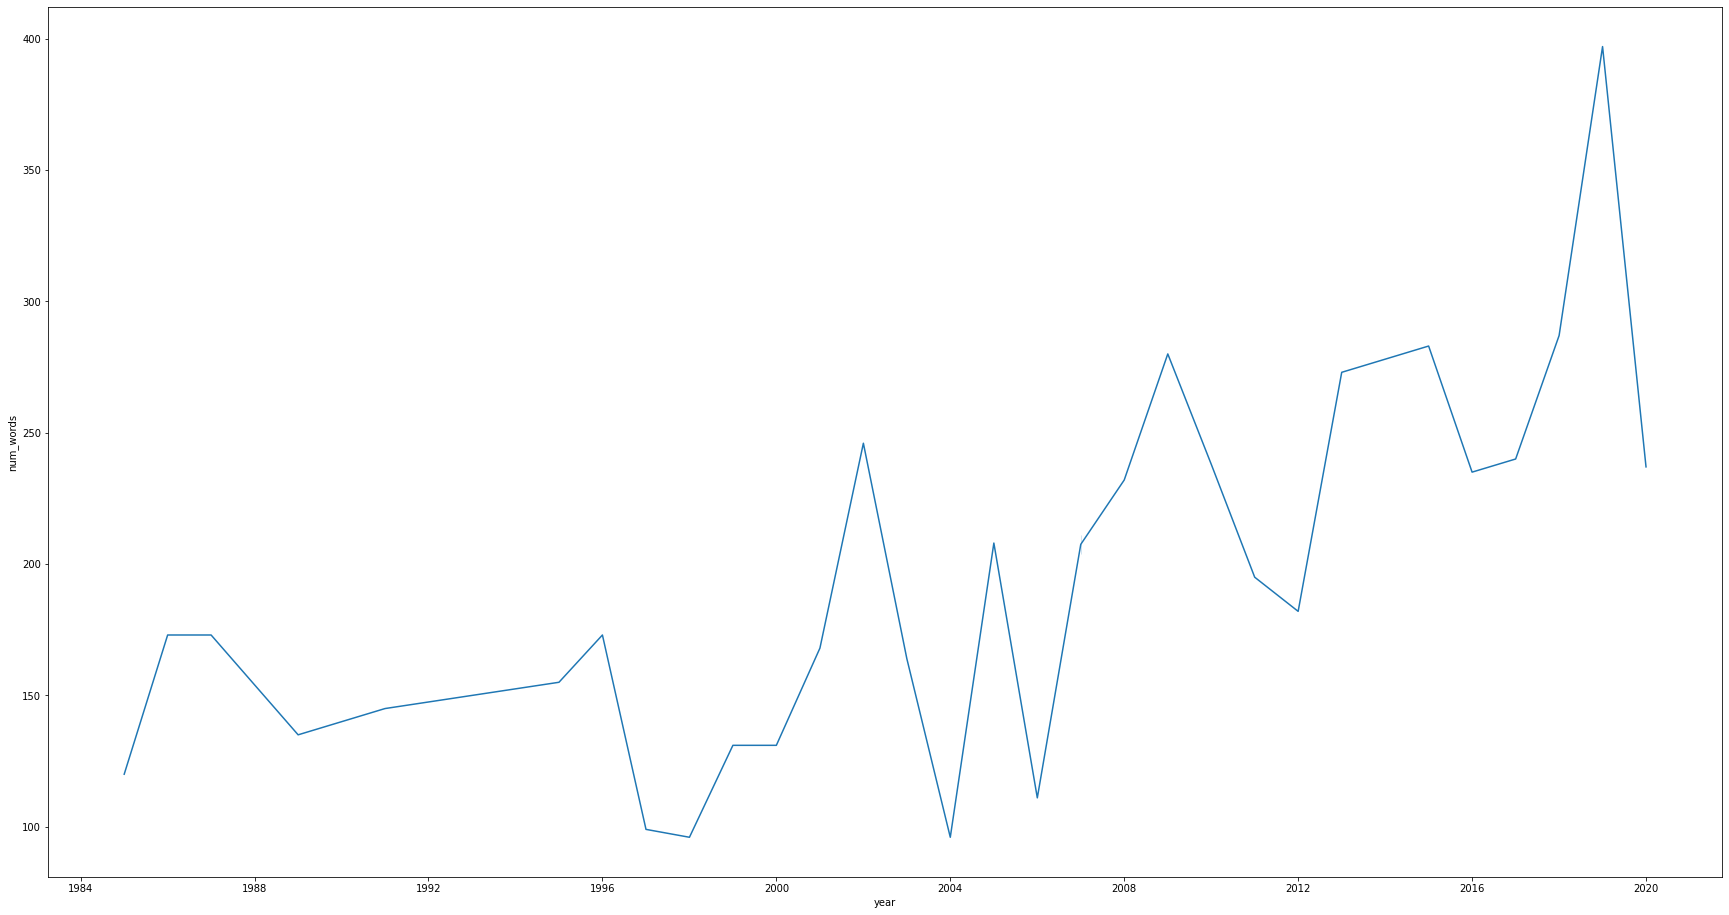

In [15]:
# Graph of total number of words vs year
sns.lineplot(x = "year", y = "num_words", data = df_lyrics)

<AxesSubplot:xlabel='year', ylabel='avg_word_len'>

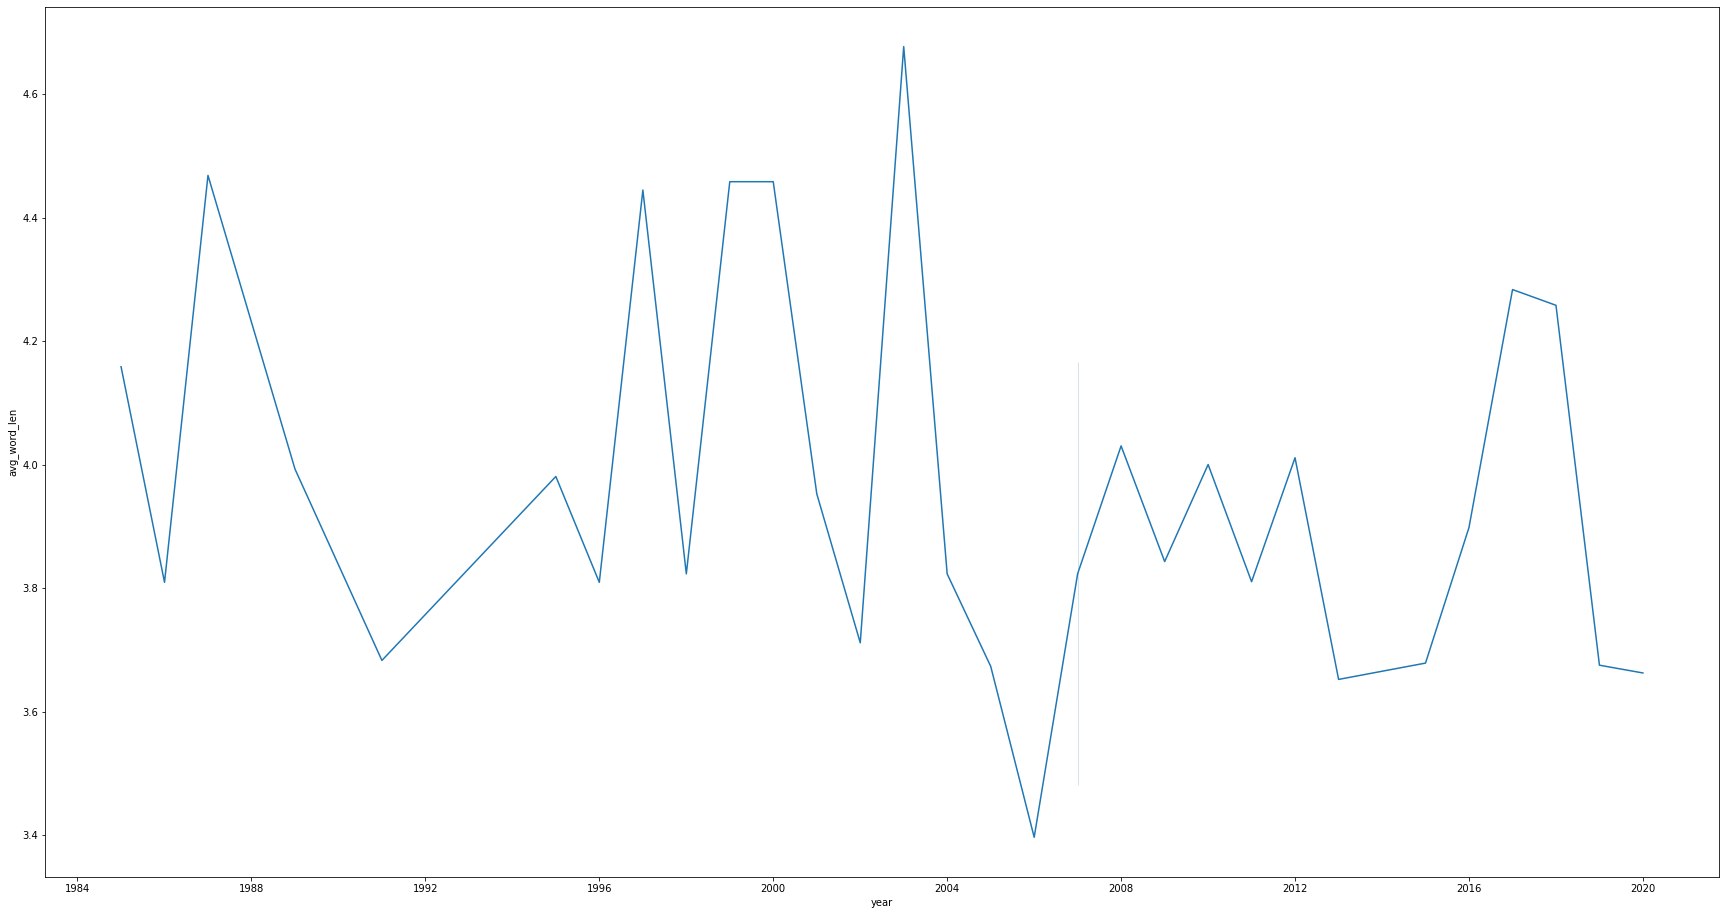

In [16]:
# Avg word length vs year
sns.lineplot(x = "year", y = "avg_word_len", data = df_lyrics)

## Vectorizing with CountVectorizer

In [17]:
corpus = df_lyrics["lyrics"].tolist()
corpus[:5]

['Stand up for Singapore, do the best you can Reach out for your fellow man You’ve got to make a stand Recognise you can play your part Let it come right from your heart Be prepared to give a little more Stand up, stand up for Singapore Stand up for Singapore, do it with a smile If you stand up for Singapore You’ll find it all worthwhile Believe in yourself, you’ve got something to share So show us all you really care Be prepared to give a little more Stand up, stand up for Singapore Singapore our home and nation Together with determination Join in like we’ve never done before Stand up, stand up for Singapore',
 'We have a vision for tomorrow, just believe, just believe We have a goal for Singapore, we can achieve, we can achieve You and me, we’ll do our part, stand together, heart to heart We’re going to show the world what Singapore can be We can achieve, we can achieve There is something down the road that we can strive for We are told no dream’s too bold that we can’t try for There

In [18]:
# Use nltk stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tristan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
dtm = vectorizer.fit_transform(corpus)

In [20]:
# Document term matrix
dtm

<31x632 sparse matrix of type '<class 'numpy.int64'>'
	with 1575 stored elements in Compressed Sparse Row format>

## Creating dataframes that match the word to the frequency of the word, both for the DTM and TF

In [21]:
import numpy as np

In [22]:
tf_array = np.asarray(dtm.sum(axis=0))
print(tf_array.shape)

(1, 632)


In [23]:
# Sort vocab dictionary by index
vocab_dict = vectorizer.vocabulary_
vocab_dict = dict(sorted(vocab_dict.items(), key = lambda x : x[1]))

In [24]:
# Convert dtm and tf to pandas df
df_dtm = pd.DataFrame.sparse.from_spmatrix(dtm)
df_dtm.columns = list(vocab_dict.keys())
df_dtm["year"] = df_lyrics["year"]

In [25]:
df_dtm.head()

,accustomed,achieve,across,add,afraid,ago,ahead,air,alight,alive,...,yeah,yearning,years,yet,yo,youll,young,youre,youthful,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1985-01-01
1,0,8,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1986-01-01
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1987-01-01
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1989-01-01
4,1,0,0,0,0,0,0,1,0,0,...,0,0,3,0,0,0,0,0,0,1991-01-01


In [26]:
df_tf = pd.DataFrame(data = {"word" : list(vocab_dict.keys()), "freq" : tf_array[0, ]})
df_tf.head()

,word,freq
0,accustomed,1
1,achieve,32
2,across,1
3,add,1
4,afraid,3


In [27]:
df_tf = df_tf.sort_values(by = "freq", ascending=False)
df_tf.head(10)

,word,freq
347,oh,178
448,singapore,107
538,together,63
254,home,48
351,one,48
241,heart,39
101,come,33
423,see,33
1,achieve,32
232,hand,31


## Visualising counts of words per document and across all 31 documents

<AxesSubplot:xlabel='word', ylabel='freq'>

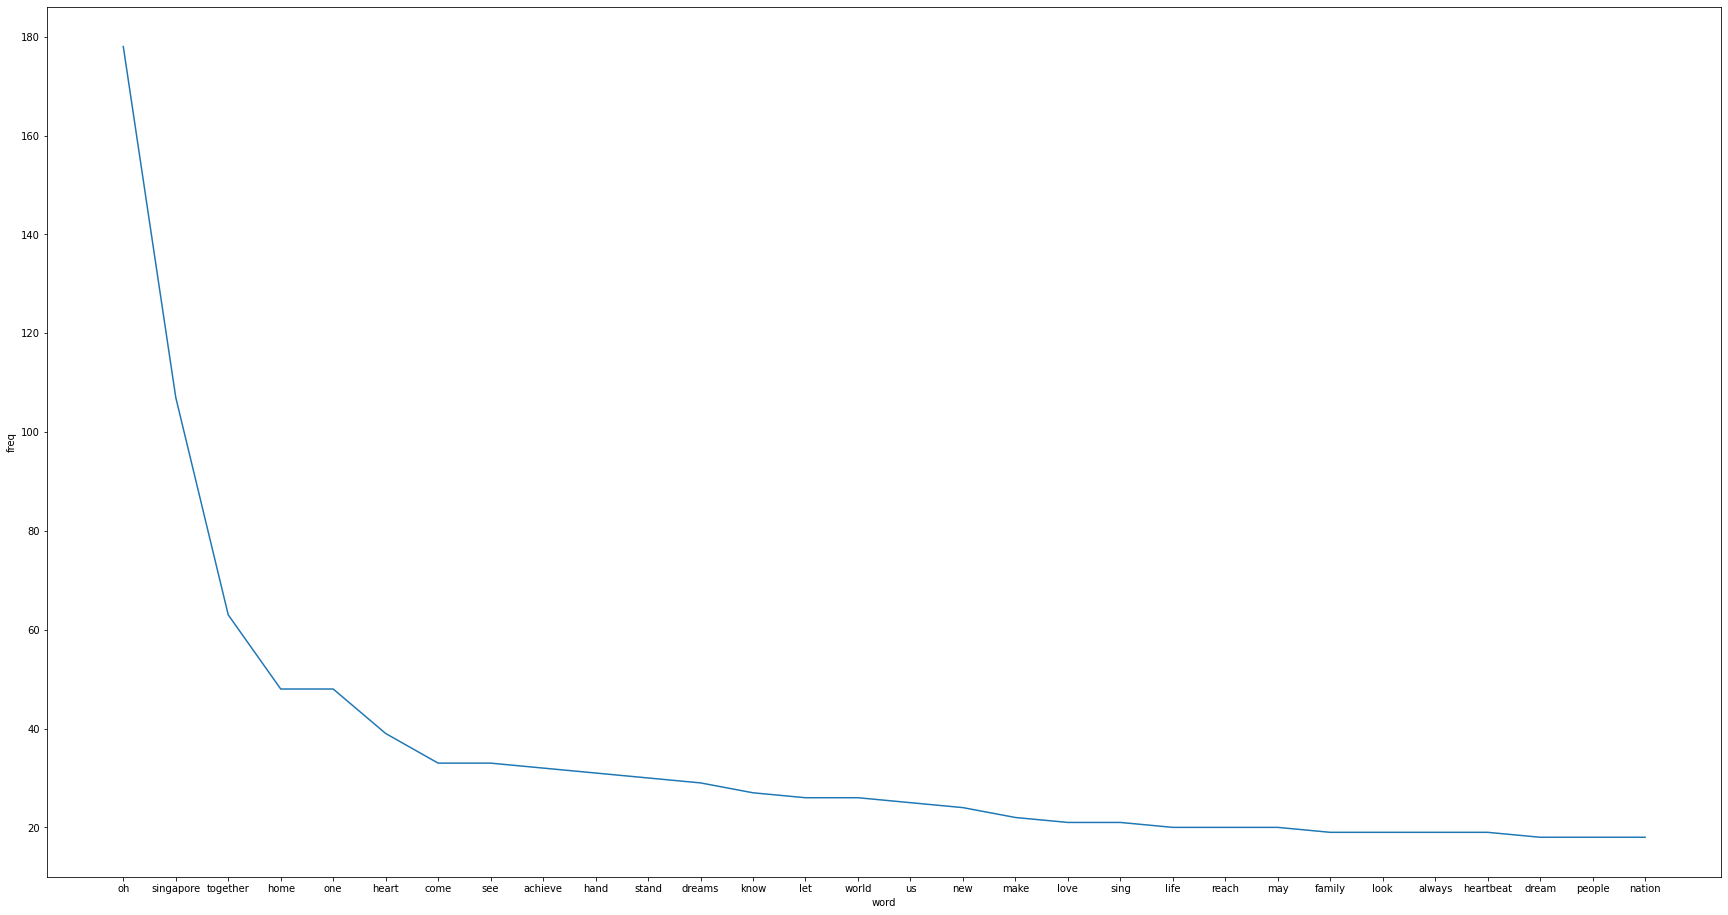

In [28]:
# Top 30 words overall
sns.lineplot(data = df_tf.head(30), x = "word", y = "freq")

<AxesSubplot:xlabel='word', ylabel='avg_freq'>

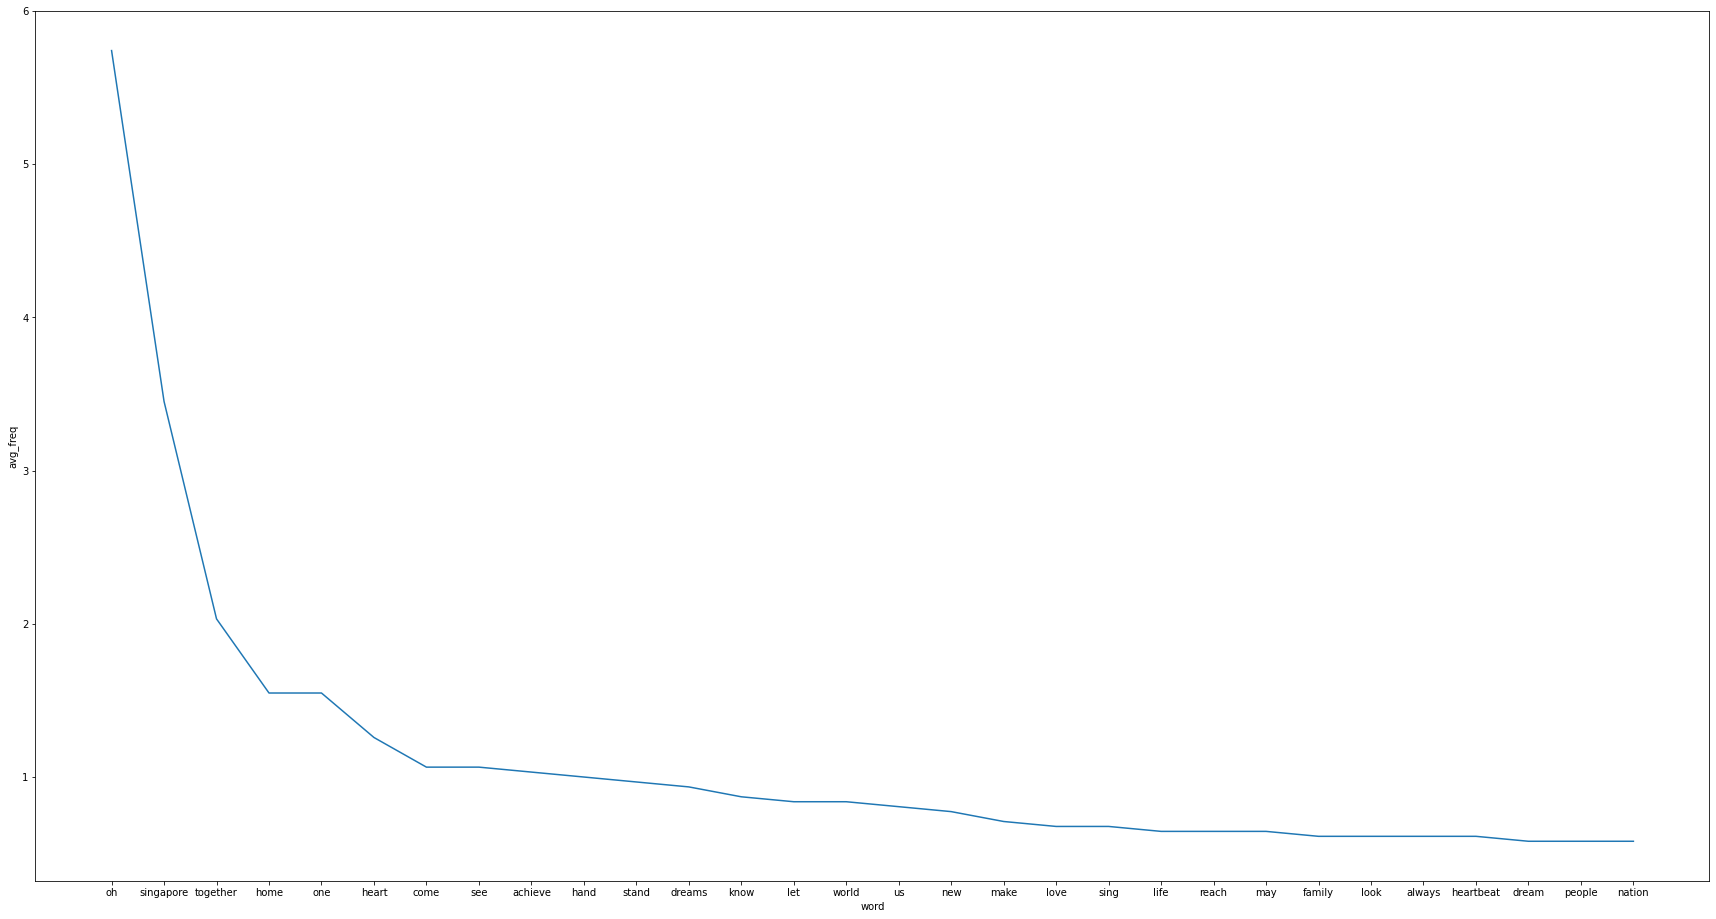

In [29]:
# Freq of top 30 words, averaged across 31 songs
df_tf["avg_freq"] = df_tf["freq"].apply(lambda x : x/31)
sns.lineplot(data = df_tf.head(30), x = "word", y = "avg_freq")

In [30]:
df_dtm.head()

,accustomed,achieve,across,add,afraid,ago,ahead,air,alight,alive,...,yeah,yearning,years,yet,yo,youll,young,youre,youthful,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1985-01-01
1,0,8,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1986-01-01
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1987-01-01
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1989-01-01
4,1,0,0,0,0,0,0,1,0,0,...,0,0,3,0,0,0,0,0,0,1991-01-01


In [31]:
import datetime

# Function that accepts a row of the dtm, sorts by count (descending), extracts the top 5 most frequent words, appends the freq and words to a new dataframe
def top_5_per_year(df) :
    indices = df.index.tolist()
    df_top_5 = pd.DataFrame(data = {"words" : [], "freq" : []})
    for i in range(max(indices)) :
        df_tmp = df.iloc[[i]]

        # Index everything except the last column since that is the year column in df_dtm
        df_tmp = pd.DataFrame(data = {"year" : [df_lyrics["year"][i].strftime("%Y")] * (len(df_tmp.columns) - 1) , "words" : df_tmp.columns.tolist()[:-1], "freq" : df_tmp.iloc[0, :-1] })

        df_tmp.reset_index(drop = True, inplace = True)
        df_tmp["year"] = pd.to_datetime(df_tmp["year"], format = "%Y")
        df_tmp["freq"] = df_tmp["freq"].astype(int)

        df_tmp = df_tmp.sort_values(by = "freq", ascending=False, axis = 0)
        df_top_5 = df_top_5.append(df_tmp.head(3), ignore_index=True)
    
    df_top_5["year"] = pd.to_datetime(df_top_5["year"], format = "%Y")

    return df_top_5

In [32]:
df_top_5 = top_5_per_year(df_dtm)
df_top_5.head(20)

,words,freq,year
0,stand,10,1985-01-01
1,singapore,7,1985-01-01
2,got,2,1985-01-01
3,achieve,8,1986-01-01
4,singapore,7,1986-01-01
5,count,6,1986-01-01
6,singapore,9,1987-01-01
7,nation,4,1987-01-01
8,strong,3,1987-01-01
9,arising,6,1989-01-01


In [33]:
import plotly.express as px

In [34]:
fig = px.bar(df_top_5, x = "year", y = "freq", color = "words")
fig.update_layout(width = 1400, height = 700)
fig.show()

## Sentiment analysis

In [35]:
# First need to preprocess the original string, lowercase, lemmatise, but don't remove stop words.
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string

def pre_process_lyrics(lyrics, remove_stopwords = False) :
    processed_str = ""
    
    if remove_stopwords == True :
        lyrics = "".join(u for u in lyrics if u not in string.punctuation or stopwords.words('english'))

    lyrics = "".join(u for u in lyrics if u not in string.punctuation)
    lyrics_split = lyrics.split()
    lemmatizer = WordNetLemmatizer()

    for s in lyrics_split :
        s = s.lower()
        s = lemmatizer.lemmatize(s)
        processed_str = processed_str + " " + s
    
    return processed_str

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tristan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
df_lyrics_sentiment = df_lyrics.copy()
df_lyrics_sentiment.head()

,year,name,lyrics,num_words,avg_word_len,combined_name
0,1985-01-01,Stand Up For Singapore,"Stand up for Singapore, do the best you can Re...",120,4.158333,"1985, Stand Up For Singapore"
1,1986-01-01,Count On Me Singapore,"We have a vision for tomorrow, just believe, j...",173,3.809249,"1986, Count On Me Singapore"
2,1987-01-01,We Are Singapore,There was a time when people said That Singapo...,173,4.468208,"1987, We Are Singapore"
3,1989-01-01,Five Stars Arising,"There's a new moon arising, out of the stormy ...",135,3.992593,"1989, Five Stars Arising"
4,1991-01-01,It’s the Little Things,"Over the years, I've grown to be a part of you...",145,3.682759,"1991, It’s the Little Things"


In [37]:
df_lyrics_sentiment["pre_process"] = df_lyrics_sentiment["lyrics"].apply(lambda x: pre_process_lyrics(x))
df_lyrics_sentiment.head()

,year,name,lyrics,num_words,avg_word_len,combined_name,pre_process
0,1985-01-01,Stand Up For Singapore,"Stand up for Singapore, do the best you can Re...",120,4.158333,"1985, Stand Up For Singapore",stand up for singapore do the best you can re...
1,1986-01-01,Count On Me Singapore,"We have a vision for tomorrow, just believe, j...",173,3.809249,"1986, Count On Me Singapore",we have a vision for tomorrow just believe ju...
2,1987-01-01,We Are Singapore,There was a time when people said That Singapo...,173,4.468208,"1987, We Are Singapore",there wa a time when people said that singapo...
3,1989-01-01,Five Stars Arising,"There's a new moon arising, out of the stormy ...",135,3.992593,"1989, Five Stars Arising",there a new moon arising out of the stormy se...
4,1991-01-01,It’s the Little Things,"Over the years, I've grown to be a part of you...",145,3.682759,"1991, It’s the Little Things",over the year ive grown to be a part of you y...


In [38]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tristan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
df_lyrics_sentiment["sentiment"] = df_lyrics_sentiment["pre_process"].apply(lambda x : sid.polarity_scores(x))
df_lyrics_sentiment.head()

,year,name,lyrics,num_words,avg_word_len,combined_name,pre_process,sentiment
0,1985-01-01,Stand Up For Singapore,"Stand up for Singapore, do the best you can Re...",120,4.158333,"1985, Stand Up For Singapore",stand up for singapore do the best you can re...,"{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compou..."
1,1986-01-01,Count On Me Singapore,"We have a vision for tomorrow, just believe, j...",173,3.809249,"1986, Count On Me Singapore",we have a vision for tomorrow just believe ju...,"{'neg': 0.013, 'neu': 0.865, 'pos': 0.123, 'co..."
2,1987-01-01,We Are Singapore,There was a time when people said That Singapo...,173,4.468208,"1987, We Are Singapore",there wa a time when people said that singapo...,"{'neg': 0.017, 'neu': 0.684, 'pos': 0.299, 'co..."
3,1989-01-01,Five Stars Arising,"There's a new moon arising, out of the stormy ...",135,3.992593,"1989, Five Stars Arising",there a new moon arising out of the stormy se...,"{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp..."
4,1991-01-01,It’s the Little Things,"Over the years, I've grown to be a part of you...",145,3.682759,"1991, It’s the Little Things",over the year ive grown to be a part of you y...,"{'neg': 0.056, 'neu': 0.632, 'pos': 0.312, 'co..."


In [40]:
df_lyrics_sentiment["compound"] = df_lyrics_sentiment["sentiment"].apply(lambda x : x["compound"])
df_lyrics_sentiment["neg"] = df_lyrics_sentiment["sentiment"].apply(lambda x : x["neg"])
df_lyrics_sentiment["neu"] = df_lyrics_sentiment["sentiment"].apply(lambda x : x["neu"])
df_lyrics_sentiment["pos"] = df_lyrics_sentiment["sentiment"].apply(lambda x : x["pos"])
df_lyrics_sentiment

,year,name,lyrics,num_words,avg_word_len,combined_name,pre_process,sentiment,compound,neg,neu,pos
0,1985-01-01,Stand Up For Singapore,"Stand up for Singapore, do the best you can Re...",120,4.158333,"1985, Stand Up For Singapore",stand up for singapore do the best you can re...,"{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compou...",0.9764,0.000,0.770,0.230
1,1986-01-01,Count On Me Singapore,"We have a vision for tomorrow, just believe, j...",173,3.809249,"1986, Count On Me Singapore",we have a vision for tomorrow just believe ju...,"{'neg': 0.013, 'neu': 0.865, 'pos': 0.123, 'co...",0.9524,0.013,0.865,0.123
2,1987-01-01,We Are Singapore,There was a time when people said That Singapo...,173,4.468208,"1987, We Are Singapore",there wa a time when people said that singapo...,"{'neg': 0.017, 'neu': 0.684, 'pos': 0.299, 'co...",0.9963,0.017,0.684,0.299
3,1989-01-01,Five Stars Arising,"There's a new moon arising, out of the stormy ...",135,3.992593,"1989, Five Stars Arising",there a new moon arising out of the stormy se...,"{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp...",0.9942,0.000,0.655,0.345
4,1991-01-01,It’s the Little Things,"Over the years, I've grown to be a part of you...",145,3.682759,"1991, It’s the Little Things",over the year ive grown to be a part of you y...,"{'neg': 0.056, 'neu': 0.632, 'pos': 0.312, 'co...",0.9906,0.056,0.632,0.312
5,1995-01-01,My People My Home,"Who are you, my country? More than celebration...",155,3.980645,"1995, My People My Home",who are you my country more than celebration ...,"{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...",0.9818,0.000,0.817,0.183
6,1996-01-01,Count On Me Singapore,"We have a vision for tomorrow, just believe, j...",173,3.809249,"1996, Count On Me Singapore",we have a vision for tomorrow just believe ju...,"{'neg': 0.013, 'neu': 0.865, 'pos': 0.123, 'co...",0.9524,0.013,0.865,0.123
7,1997-01-01,Singapore Town,You could take a little trip around Singapore ...,99,4.444444,"1997, Singapore Town",you could take a little trip around singapore...,"{'neg': 0.021, 'neu': 0.914, 'pos': 0.065, 'co...",0.6249,0.021,0.914,0.065
8,1998-01-01,Home,Whenever I am feeling low I look around me and...,96,3.822917,"1998, Home",whenever i am feeling low i look around me an...,"{'neg': 0.024, 'neu': 0.851, 'pos': 0.125, 'co...",0.7870,0.024,0.851,0.125
9,1999-01-01,Together,Let us be together aspire to achieve No matter...,131,4.458015,"1999, Together",let u be together aspire to achieve no matter...,"{'neg': 0.046, 'neu': 0.702, 'pos': 0.252, 'co...",0.9753,0.046,0.702,0.252


In [41]:
# Categorised by top compound scores
df_lyrics_sentiment[["year", "name", "neg", "neu", "pos", "compound"]].sort_values(by = "compound", ascending=False)

,year,name,neg,neu,pos,compound
24,2013-01-01,One Singapore,0.006,0.667,0.326,0.9985
15,2005-01-01,Reach Out For The Skies,0.012,0.605,0.383,0.9979
13,2003-01-01,One United People,0.000,0.627,0.373,0.9971
27,2017-01-01,Because It’s Singapore,0.000,0.704,0.296,0.9969
2,1987-01-01,We Are Singapore,0.017,0.684,0.299,0.9963
23,2012-01-01,Love At First Light,0.010,0.647,0.343,0.9963
25,2015-01-01,Our Singapore,0.007,0.766,0.227,0.9951
3,1989-01-01,Five Stars Arising,0.000,0.655,0.345,0.9942
28,2018-01-01,We Are Singapore (remix),0.040,0.806,0.154,0.9915
29,2019-01-01,Our Singapore (remix),0.023,0.814,0.163,0.9908


In [42]:
# Categorised by top positive scores
df_lyrics_sentiment[["year", "name", "neg", "neu", "pos", "compound"]].sort_values(by = "pos", ascending=False)

,year,name,neg,neu,pos,compound
15,2005-01-01,Reach Out For The Skies,0.012,0.605,0.383,0.9979
13,2003-01-01,One United People,0.000,0.627,0.373,0.9971
3,1989-01-01,Five Stars Arising,0.000,0.655,0.345,0.9942
23,2012-01-01,Love At First Light,0.010,0.647,0.343,0.9963
24,2013-01-01,One Singapore,0.006,0.667,0.326,0.9985
4,1991-01-01,It’s the Little Things,0.056,0.632,0.312,0.9906
2,1987-01-01,We Are Singapore,0.017,0.684,0.299,0.9963
27,2017-01-01,Because It’s Singapore,0.000,0.704,0.296,0.9969
11,2001-01-01,Where I Belong,0.043,0.680,0.277,0.9900
9,1999-01-01,Together,0.046,0.702,0.252,0.9753


In [43]:
df_lyrics_sentiment[["year", "name", "neg", "neu", "pos", "compound"]].sort_values(by = "neg", ascending=False)

,year,name,neg,neu,pos,compound
4,1991-01-01,It’s the Little Things,0.056,0.632,0.312,0.9906
10,2000-01-01,Shine On Me,0.046,0.702,0.252,0.9753
9,1999-01-01,Together,0.046,0.702,0.252,0.9753
17,2007-01-01,There's No Place I'd Rather Be,0.044,0.875,0.081,0.7964
11,2001-01-01,Where I Belong,0.043,0.680,0.277,0.9900
28,2018-01-01,We Are Singapore (remix),0.040,0.806,0.154,0.9915
12,2002-01-01,We Will Get There,0.033,0.783,0.183,0.9882
26,2016-01-01,Tomorrow's Here Today,0.029,0.827,0.144,0.9671
8,1998-01-01,Home,0.024,0.851,0.125,0.7870
14,2004-01-01,Home (Choral),0.024,0.851,0.125,0.7870


In [44]:
df_lyrics_sentiment[["year", "name", "neg", "neu", "pos", "compound"]].sort_values(by = "neu", ascending=False)

,year,name,neg,neu,pos,compound
7,1997-01-01,Singapore Town,0.021,0.914,0.065,0.6249
17,2007-01-01,There's No Place I'd Rather Be,0.044,0.875,0.081,0.7964
6,1996-01-01,Count On Me Singapore,0.013,0.865,0.123,0.9524
1,1986-01-01,Count On Me Singapore,0.013,0.865,0.123,0.9524
14,2004-01-01,Home (Choral),0.024,0.851,0.125,0.7870
8,1998-01-01,Home,0.024,0.851,0.125,0.7870
30,2020-01-01,Everything I Am,0.013,0.845,0.142,0.9797
16,2006-01-01,My Island Home,0.000,0.843,0.157,0.9291
20,2009-01-01,What Do You See,0.000,0.834,0.166,0.9907
26,2016-01-01,Tomorrow's Here Today,0.029,0.827,0.144,0.9671


<AxesSubplot:xlabel='year', ylabel='value'>

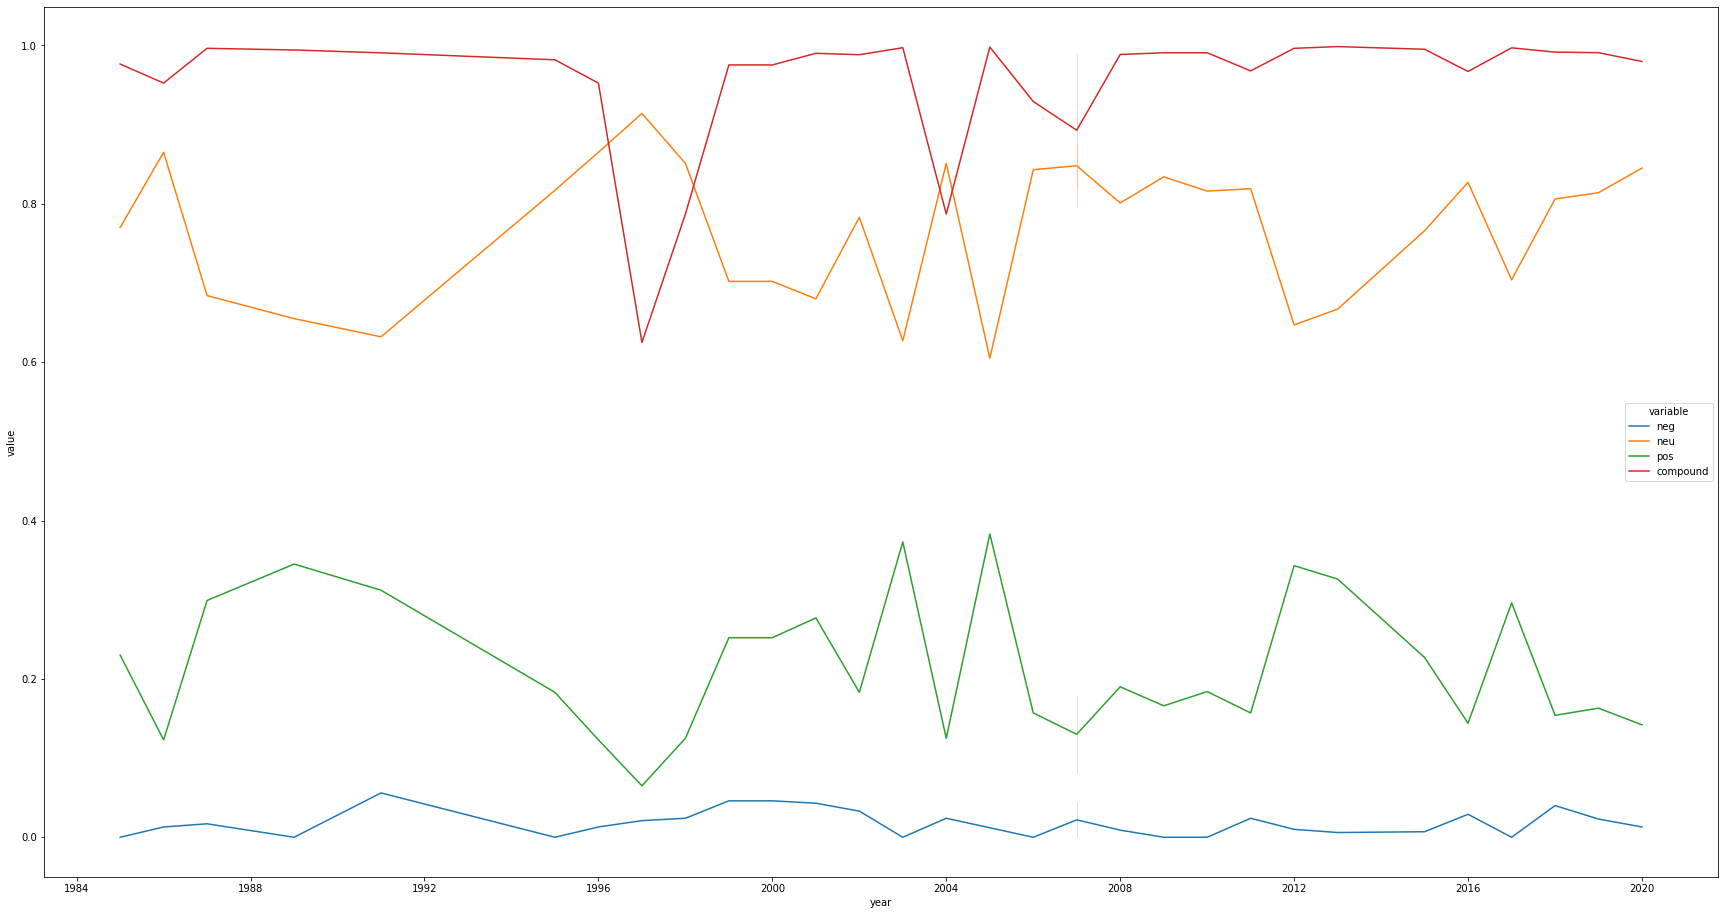

In [45]:
sns.lineplot(data = pd.melt(df_lyrics_sentiment[["year", "neg", "neu", "pos", "compound"]], ["year"]), x = "year", y = "value", hue = "variable")

## Word cloud

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [47]:
single_string = []

for lyrics in df_lyrics_sentiment["pre_process"].tolist() :
    single_string.append(" ".join(c for c in lyrics.split() if c not in stopwords.words('english')))

single_string = "".join(single_string)

print(single_string)

stand singapore best reach fellow man you’ve got make stand recognise play part let come right heart prepared give little stand stand singapore stand singapore smile stand singapore you’ll find worthwhile believe you’ve got something share show u really care prepared give little stand stand singapore singapore home nation together determination join like we’ve never done stand stand singaporevision tomorrow believe believe goal singapore achieve achieve we’ll part stand together heart heart we’re going show world singapore achieve achieve something road strive told dream’s bold can’t try there’s spirit air it’s feeling share we’re going build better life achieve achieve count singapore count give best we’ll part stand together heart heart we’re going show world singapore achieve achieve count singapore count singapore count give best count singaporewa time people said singapore won’t make wa time trouble seemed much u take built nation strong free reaching together peace harmony countr

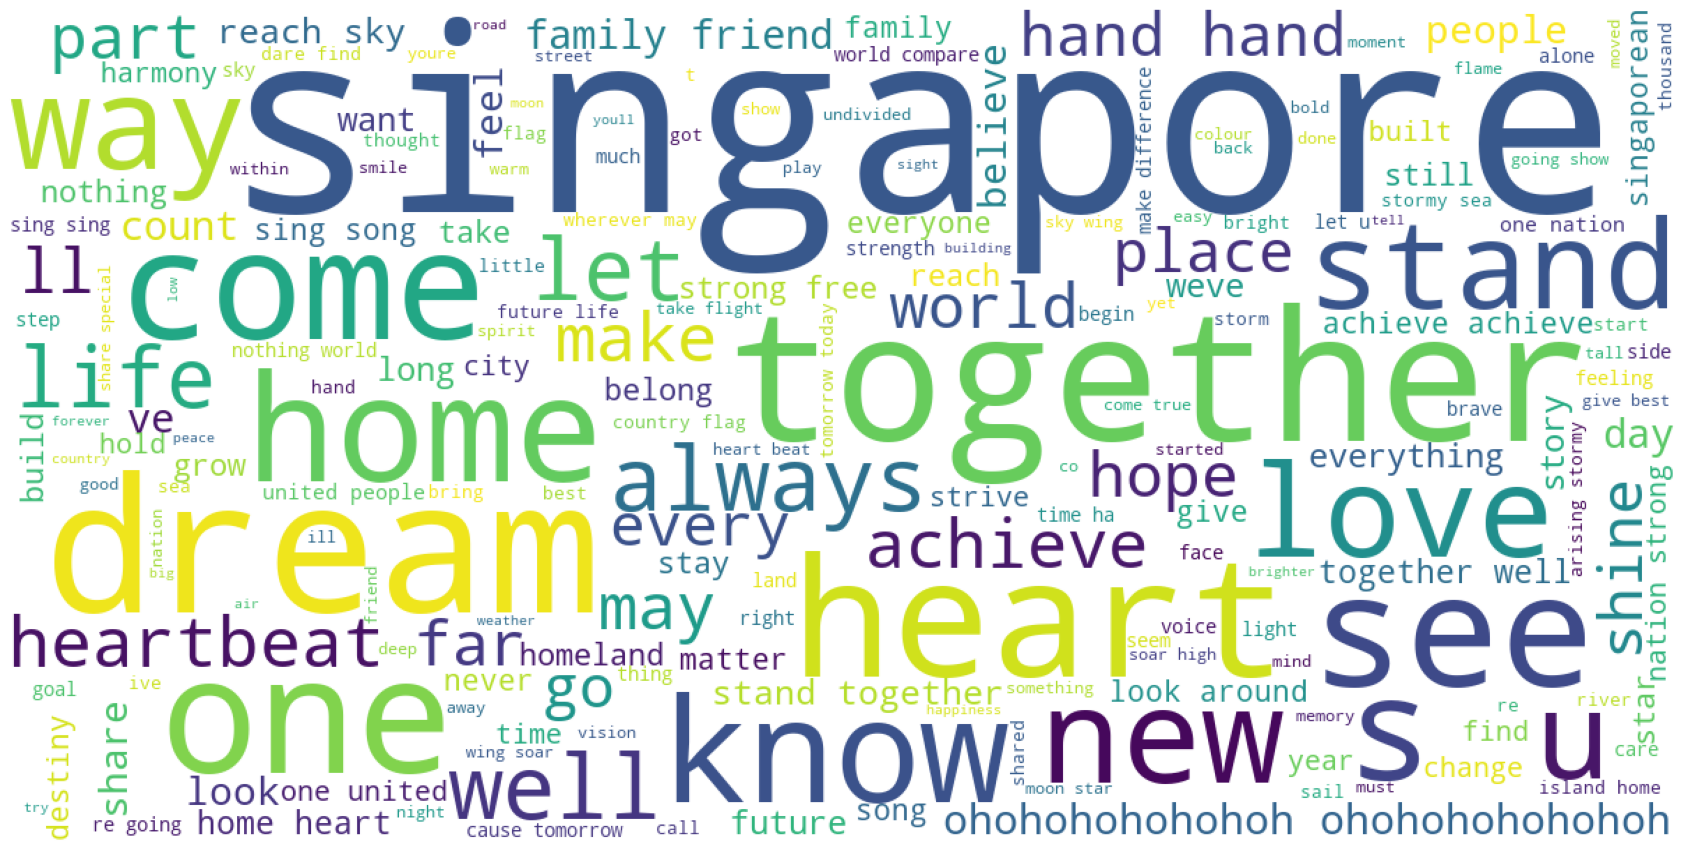

In [48]:
wordcloud = WordCloud(width = 1200, height = 600, min_font_size = 8, background_color = "white").generate(text = single_string)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()